## Stacks pipeline batch 1 - data exploration & visualization

<br>
This notebook includes: 
1. heterozygosity v. read depth
2. Haplotype Fis distribution
4. read depth by tag number, distribution of read depth per tag
5. Histogram of SNP position in read
6. Fst v. SNP position (for haplotypes with only 1 SNP)
7. Het v. SNP position *why are some loci in <8 pops?*

To Do: 
1. Fis v. heterozygosity

<br>
### (1) heterozygosity v. read depth 

This uses a script from Dan Drinan to compare heterozygosity v. read depth in an individual. I ran the script on all individuals that were *retained after the filtering step*, or that had <20% genotypes missing

In [23]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses'

In [4]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [6]:
!head hetVsReadDepth.py



################################################################################
#
# hetVsReadDepth.py - this is a script used to compare heterozygosity vs.
# read depth in an individual or list of individuals
#
# 2017-March-28
# Daniel Drinan (ddrinan@uw.edu)
#


In [9]:
!mv hetVsReadDepth.py ../samplesT92/hetVsReadDepth.py

In [25]:
cd ../samplesT92/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/samplesT92


In [41]:
!python hetVsReadDepth_gzip.py \
-l ../scripts/samples_fqfiles_filtered.txt \
-f ../stacks_wgenome/batch_1.filteredIndivids.filteredMAF_filteredLoci20p.gen \
-o ../analyses/batch1_HetvReadDepth_filtered \
-d 4

KOD03_035 2644952.0 0.26479832373

KOD03_051 1353028.0 0.228912466844

KOD03_052 3604717.0 0.241244119185

KOD03_054 1783756.0 0.309866527087

KOD03_055 3668576.0 0.347464239272

KOD03_056 1196107.0 0.227381905524

KOD03_057 9225135.0 0.444126819127

KOD03_058 1736725.0 0.184086134454

KOD03_059 1153457.0 0.213325183374

KOD03_061 5100042.0 0.345303148582

KOD03_063 2796354.0 0.299554857292

KOD03_064 8943131.0 0.446725571726

KOD03_065 3613026.0 0.375162718042

KOD03_066 5240244.0 0.430353430353

KOD03_067 6279450.0 0.356492323705

KOD03_068 1158489.0 0.205970149254

KOD03_069 2271243.0 0.202402716114

KOD03_070 1027848.0 0.201787258576

KOD03_071 4874649.0 0.216497527973

KOD03_072 893099.0 0.18705242051

KOD03_073 818087.0 0.173140620295

KOD03_074 2681786.0 0.202152796009

KOD03_075 1064316.0 0.171848501979

KOD03_076 2305672.0 0.230104712042

KOD03_077 1722277.0 0.192716640085

KOD03_078 5446567.0 0.242771555092

KOD03_079 1019426.0 0.172878440367

KOD03_080 938589.0 0.19529478458

In [42]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [45]:
myfile = open("batch1_HetvReadDepth_filtered", "r")

count = 0
read_depth = []
prop_het = []

for line in myfile: 
    if count > 1: 
        new_depth = line.strip().split()[1]
        new_het = line.strip().split()[2]
        read_depth.append(new_depth)
        prop_het.append(new_het)
        count += 1
    else: 
        count += 1

myfile.close()

print "Processed ", count, " samples."


Processed  265  samples.


In [50]:
length = len(read_depth)
for i in range(0,length):
    read_depth[i] = float(read_depth[i])

length = len(prop_het)
for i in range(0,length):
    prop_het[i] = float(prop_het[i])
    

In [56]:
import numpy as np
import matplotlib.pyplot as plt

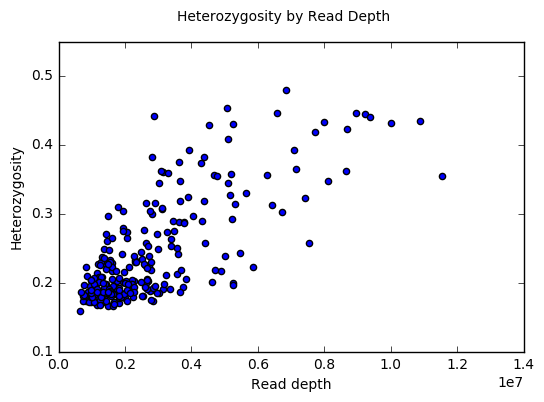

In [57]:
plt.scatter(read_depth, prop_het)
plt.suptitle("Heterozygosity by Read Depth")
plt.xlabel("Read depth")
plt.ylabel("Heterozygosity")
plt.show()

In [58]:
plt.close()

To find the correlation between the two: 

In [59]:
np.corrcoef(read_depth, prop_het)

array([[ 1.        ,  0.75939723],
       [ 0.75939723,  1.        ]])

So the correlation is **0.7594**



<br>
I'm curious to see if this is different from the first runthrough of stacks, which did not use a reference genome. So I went back and did the filtering steps for the `stacks/batch_1.genepop` and then ran the steps above on that file: 


<br>
<br>
<br>
<br>

### (2) Haplotype Fis distribution 

**(1)** I ran this [r script](https://github.com/mfisher5/PCod-US-repo/blob/master/analyses/Fis.R) - borrowed from Natalie - to find per population Fis and heterozygosity. 

In [12]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/samplesT92'

In [13]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


<br>
**(2)** Plot in frequency histogram based off of Natalie's [scallop notebook](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/script_demos_notebooks/Plot%20num%20alleles%20per%20locus%20from%20catalog%20file.ipynb).

In [14]:
genepop = open("USpcod_Fis_3-24.txt", "r")
pops = ["Kodiak03", "Adak06", "WashCoast05", "HecStrait04", "PugetSound12", "GeorgiaStrait13", "PWSound12", "UnimakPass03"]
fis_bypop = []
fis_all = []

counter = 1
NA_count = 0
total_count = 0
for line in genepop: 
    if counter == 1: 
            counter += 1
    else: 
        fis_values = line.strip().split()[1:]
        for i in fis_values:
            if i == "NA":
                NA_count += 1
                total_count += 1
            else: 
                fis_all.append(float(i))
                total_count += 1
        counter += 1

total_loci = counter - 2
print "Fis values recorded from ", total_loci, " loci."
print "Removed ", NA_count, " NAs from ", total_count, " Fis values"
        

Fis values recorded from  3848  loci.
Removed  5117  NAs from  30784  Fis values


In [15]:
for i in range(0, len(fis_all)): 
    fis_all[i] = float(fis_all[i])

In [16]:
import numpy as np
import matplotlib.pyplot as plt

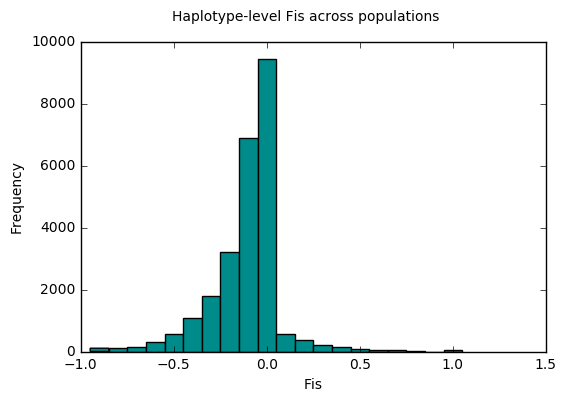

In [61]:
plt.hist(fis_all, bins = np.arange(-1, 1.1, .1)+0.05, color = "darkcyan")
plt.suptitle("Haplotype-level Fis across populations")
plt.xlabel("Fis")
plt.ylabel("Frequency")
plt.show()

In [18]:
fis_file = open("USpcod_Fis_3-24.txt", "r")
lines = fis_file.readlines() # exclude header
headerline = lines[0] # get header line
restlines = lines[1:] # get rest of lines
header_pops = headerline.strip().split("\t")
header_pops = header_pops[1:]
pops = ["Kodiak03", "Adak06", "WashCoast05", "HecStrait04", "PugetSound12", "GeorgiaStrait13", "PWSound12", "UnimakPass03"]

In [19]:
header_pops

['"AD06_048"',
 '"WC05_048"',
 '"HS04_048"',
 '"PS12_009"',
 '"GS13_017"',
 '"PWS12_133"',
 '"UP03_048"']

In [20]:
fis_sets = []
NA_count = 0
total_count = 0

snp_all_fis = []
for pop in header_pops:
    pop_fis = []
    pop_index = header_pops.index(pop) + 1
    for line in restlines:
        linelist = line.strip().split("\t")
        snp_fis = linelist[pop_index]
        if snp_fis == "NA":
            NA_count += 1
            total_count += 1
        elif snp_fis != "NA":
            snp_fis = float(snp_fis)
            pop_fis.append(snp_fis)
            snp_all_fis.append(snp_fis)
            total_count += 1
    fis_sets.append(pop_fis)

print "NA count: " + str(NA_count)
print "NAs made up " + str(float(NA_count)/float(total_count)*100)[0:5] + "% of your Fis estimates."

NA count: 4616
NAs made up 17.13% of your Fis estimates.


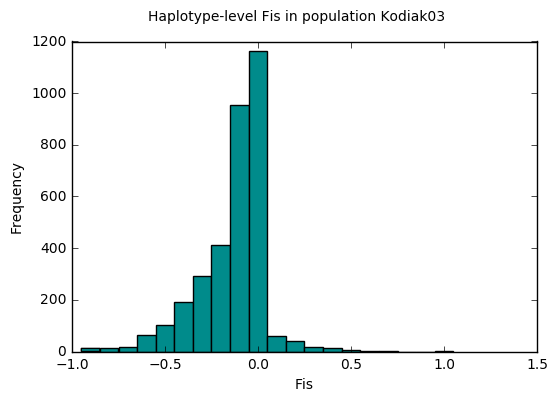

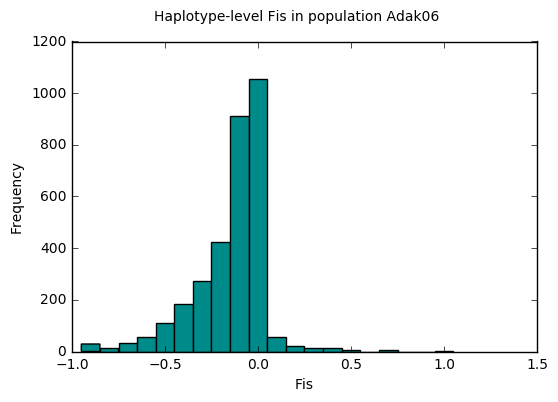

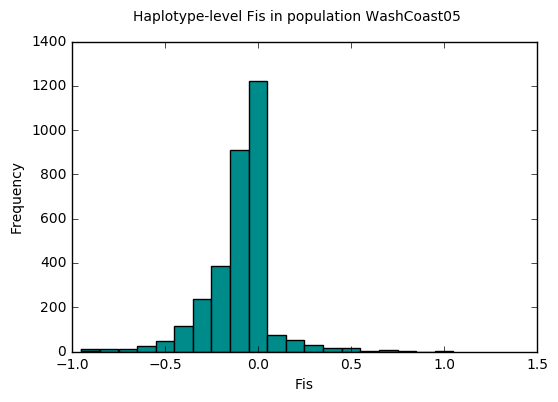

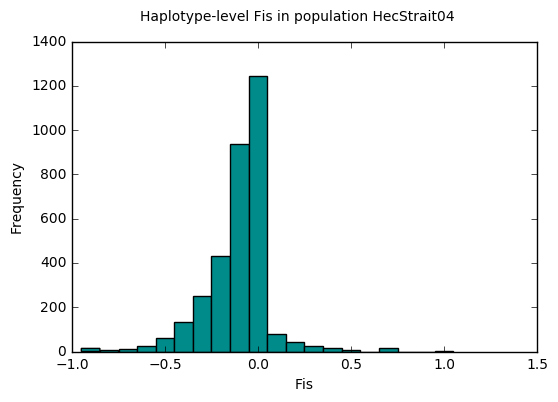

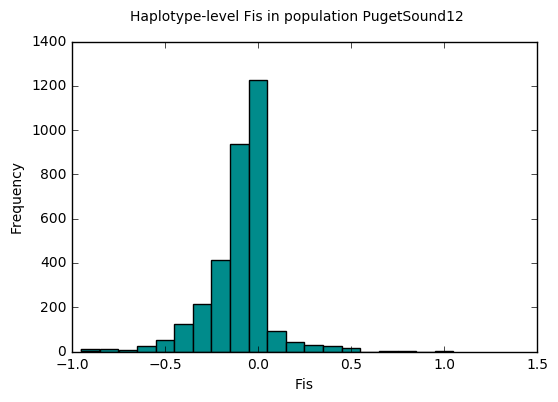

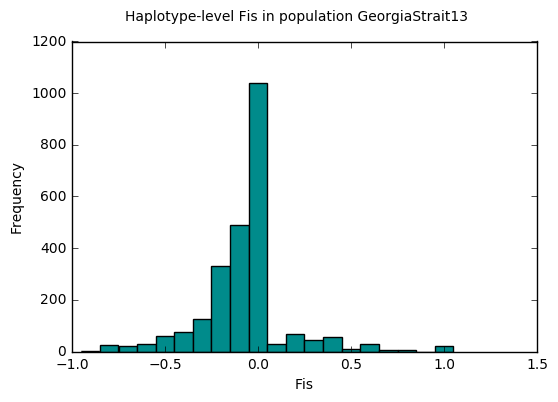

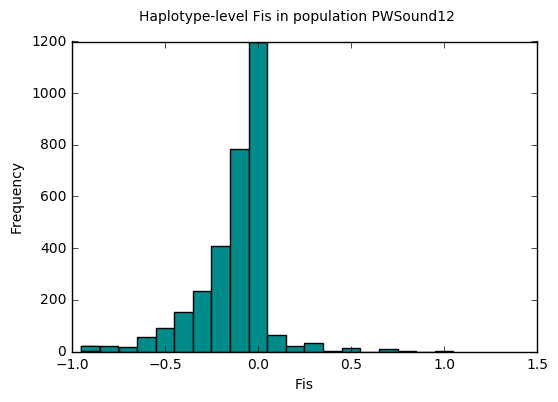

In [60]:
for i in range(0,len(header_pops)):
    plt.hist(fis_sets[i], bins = np.arange(-1, 1.1, .1)+0.05, color = "darkcyan")
    plt.suptitle("Haplotype-level Fis in population " + pops[i])
    plt.xlabel("Fis")
    plt.ylabel("Frequency")
    plt.show()

In [22]:
fis_file.close()




<br>
<br>
<br>
### (3) average distribution of read depth per tag ID


Part of the following code was borrowed from Natalies [notebook](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/data_processing_notebooks/plot_tagID_v_read_depth.ipynb). 

In [2]:
cd ../stacks_wgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_wgenome


In [3]:
!printf "%s\n" *.matches.tsv > list_matches_filenames.txt

In [4]:
!head list_matches_filenames.txt

AD06_001.matches.tsv
AD06_002.matches.tsv
AD06_003.matches.tsv
AD06_004.matches.tsv
AD06_005.matches.tsv
AD06_006.matches.tsv
AD06_007.matches.tsv
AD06_008.matches.tsv
AD06_009.matches.tsv
AD06_010.matches.tsv


!!! Manually removed Pribilof Islands!!!

In [8]:
# create a list of .matches.tsv file names to open below
file_of_filenames = open("list_matches_filenames.txt","r")
lines = file_of_filenames.readlines()
filename_list = []
for line in lines:
    filename = line.strip()
    filename_list.append(filename)

In [9]:
print filename_list[0:5]

['AD06_001.matches.tsv', 'AD06_002.matches.tsv', 'AD06_003.matches.tsv', 'AD06_004.matches.tsv', 'AD06_005.matches.tsv']


In [23]:
#initiate dictionary
rd_final_dict = {}
reps = 0

for file in filename_list:
    rd_dict = {}
    indfile = open(file,"r")
    lines = indfile.readlines()[1:]   #read all of file except header
    newcount = 0
    #create the individual's dictionary of read depths per locus
    for line in lines:
        linelist = line.strip().split()
        locus = int(linelist[2])
        count = int(linelist[6])
        if locus not in rd_dict:
            rd_dict[locus] = int(count) 
        elif locus in rd_dict:
            oldcount = rd_dict[locus]
            newcount = oldcount + count
            rd_dict[locus] = newcount
        else:
            print "Something funky is going on."
    #append all individual's counts to the final dictionary by locus
    locus_list = rd_dict.keys()
    for locus in locus_list: 
        reads = rd_dict[locus]
        if locus not in rd_final_dict: 
            rd_final_dict[locus] = [reads]
        else: 
            averages = rd_final_dict[locus]
            averages.append(reads)
            rd_final_dict[locus] = averages
    reps += 1
    print "file ", file, " counted."
    indfile.close()

file  AD06_001.matches.tsv  counted.
file  AD06_002.matches.tsv  counted.
file  AD06_003.matches.tsv  counted.
file  AD06_004.matches.tsv  counted.
file  AD06_005.matches.tsv  counted.
file  AD06_006.matches.tsv  counted.
file  AD06_007.matches.tsv  counted.
file  AD06_008.matches.tsv  counted.
file  AD06_009.matches.tsv  counted.
file  AD06_010.matches.tsv  counted.
file  AD06_011.matches.tsv  counted.
file  AD06_012.matches.tsv  counted.
file  AD06_013.matches.tsv  counted.
file  AD06_014.matches.tsv  counted.
file  AD06_015.matches.tsv  counted.
file  AD06_016.matches.tsv  counted.
file  AD06_017.matches.tsv  counted.
file  AD06_018.matches.tsv  counted.
file  AD06_019.matches.tsv  counted.
file  AD06_020.matches.tsv  counted.
file  AD06_021.matches.tsv  counted.
file  AD06_022.matches.tsv  counted.
file  AD06_023.matches.tsv  counted.
file  AD06_024.matches.tsv  counted.
file  AD06_025.matches.tsv  counted.
file  AD06_026.matches.tsv  counted.
file  AD06_027.matches.tsv  counted.
f

In [26]:
#checking final dictionary counts to make sure they are appending
#and not summing
print rd_final_dict[100]

[121, 48, 60, 43, 54, 93, 21, 22, 72, 29, 10, 12, 96, 81, 29, 30, 32, 39, 15, 39, 20, 83, 78, 36, 13, 49, 89, 23, 21, 15, 44, 88, 25, 84, 31, 42, 59, 75, 98, 28, 14, 98, 108, 17, 69, 12, 16, 62, 108, 48, 18, 14, 72, 60, 56, 20, 82, 56, 110, 22, 136, 27, 82, 68, 236, 220, 230, 118, 13, 85, 20, 136, 19, 28, 54, 46, 34, 97, 16, 26, 111, 71, 36, 42, 12, 43, 11, 171, 30, 19, 14, 59, 36, 24, 67, 45, 77, 28, 59, 15, 20, 67, 40, 258, 29, 15, 15, 130, 15, 60, 276, 75, 146, 168, 10, 62, 15, 121, 12, 17, 47, 18, 47, 38, 192, 13, 17, 107, 95, 40, 105, 83, 22, 85, 38, 14, 45, 18, 69, 32, 23, 82, 15, 46, 91, 24, 252, 23, 20, 106, 21, 66, 206, 133, 289, 83, 23, 93, 23, 173, 21, 59, 76, 12, 69, 24, 88, 22, 24, 79, 26, 36, 72, 49, 52, 13, 167, 50, 17, 44, 21, 51, 42, 25, 294, 32, 243, 144, 67, 316, 59, 291, 40, 80, 343, 70, 52, 98, 37, 42, 191, 135, 45, 57, 74, 44, 87, 30, 119, 21, 87, 49, 36, 27, 37, 69, 39, 96, 281, 43, 97, 60, 21, 21, 17, 77, 49, 16, 100, 49, 32, 15, 37, 13, 23, 24, 149, 215, 23, 12

In [28]:
#take averages at each locus
locus_list = rd_final_dict.keys()
rd_avg_dict = {}
for locus in locus_list: 
    newlist = rd_final_dict[locus]
    average = float(sum(newlist))/float(len(newlist))
    rd_avg_dict[locus] = average
        

In [31]:
#create a list of the read depth averages 
#by extracting values from dictionary
count_list = []
for locus in locus_list:
    avg_reads = rd_avg_dict[locus]
    count_list.append(avg_reads)

In [32]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

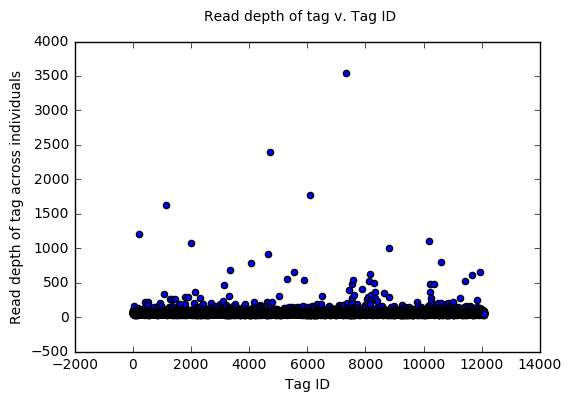

In [33]:
#create scatterplot
plt.scatter(locus_list, count_list)
plt.suptitle("Read depth of tag v. Tag ID")
plt.xlabel("Tag ID")
plt.ylabel("Read depth of tag across individuals")
plt.show()

In [34]:
plt.close()

In [35]:
# subset data to focus on read depths less than 1000
count_less_1000 = [num for num in count_list if num < 1000]

In [36]:
# what number of tags have a read depth of less than 100,000
len(count_less_1000)

12062

In [37]:
# what number of tags have a read depth of greater than 1000
len(count_list) - len(count_less_1000)

7

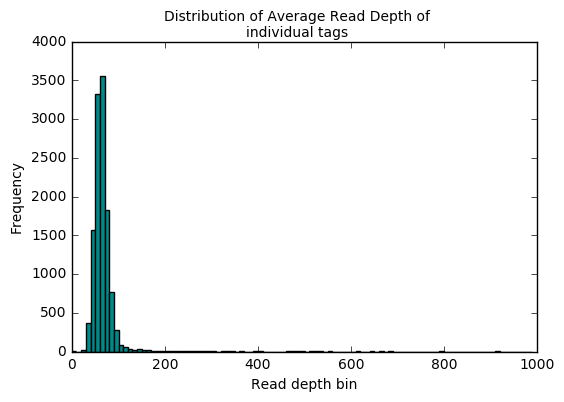

In [39]:
plt.hist(count_less_1000, bins = np.arange(0,1000, 10),color = "darkcyan")
plt.xlabel("Read depth bin")
plt.ylabel("Frequency")
plt.suptitle("Distribution of Average Read Depth of\nindividual tags")
plt.show()

In [87]:
plt.close()

In [40]:
# subset read depths less than 400 (densest range in plot above)
count_less_400 = [num for num in count_list if num < 400]

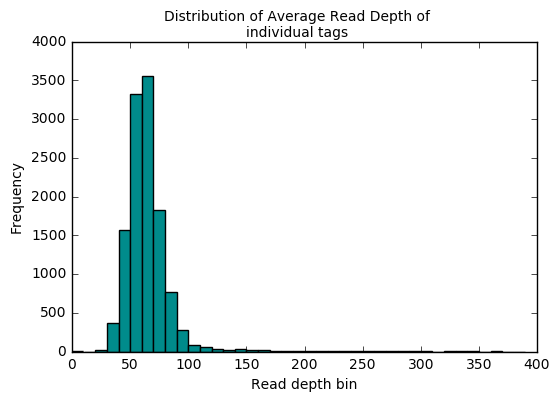

In [41]:
plt.hist(count_less_1000, bins = np.arange(0,400, 10),color = "darkcyan")
plt.xlabel("Read depth bin")
plt.ylabel("Frequency")
plt.suptitle("Distribution of Average Read Depth of\nindividual tags")
plt.show()

In [42]:
plt.close()


<br>
### Distribution of SNP Positions along Read Length

<br>


In [3]:
cd ../analyses/stacks_pipeline_visuals/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses/stacks_pipeline_visuals


In [9]:
# create a list of snp position using marine's catalog file
infile = open("../../stacks_wgenome/batch_1.biallelic_catalog.tsv", "r")

snp_positions = []

for line in infile:
    linelist = line.strip().split("\t")
    if len(linelist) == 4:
        snp_pos = int(linelist[3])
        snp_positions.append(snp_pos)
    elif len(linelist) == 5:
        snp_pos = int(linelist[3])
        snp_positions.append(snp_pos)
        snp_pos = int(linelist[4])
        snp_positions.append(snp_pos)
        
infile.close()



In [10]:
len(snp_positions)

6010

In [6]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

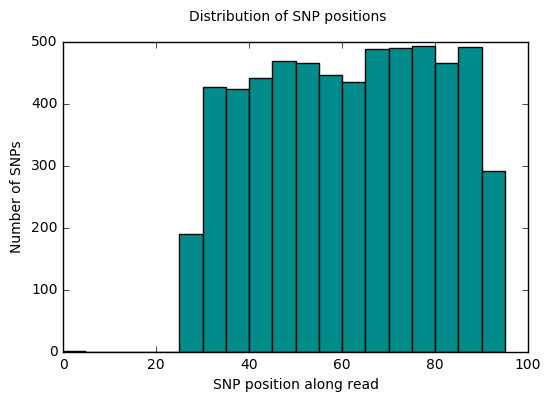

In [18]:
# plot histogram
plt.hist(snp_positions, bins = np.arange(0,100, 5), color = "darkcyan")
plt.xlabel("SNP position along read")
plt.ylabel("Number of SNPs")
plt.suptitle("Distribution of SNP positions")
plt.show()

In [19]:
plt.close()



### Fst v. SNP position

In [20]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses/stacks_pipeline_visuals'

In [16]:
# create a dictionary with snp positions at each locus
# uses marine's catalog file, only for haplotypes with a single snp

infile = open("../../stacks_wgenome/batch_1.biallelic_catalog.tsv", "r")

#create dictionary of snp positions by locus
snp_pos_dict = {}

for line in infile:
    linelist = line.strip().split("\t")
    if len(linelist) == 4:
        snp_pos = int(linelist[3])
        locus = linelist[0]
        snp_pos_dict[locus] = snp_pos
    
        
infile.close()


infile2 = open("../genepop/batch_1_FSTgenepop_parsed_output.txt", "r")

# create dictionary of fis values by locus
fst_dict = {}

for line in infile2:
    if "locus" not in line:
        locus = line.strip().split()[0]
        fst = float(line.strip().split()[2])
        fst_dict[locus] = fst

infile2.close()


In [17]:
# check to make sure that all SNPs from the FST genepop file are in the 
#SNP list from the biallelic catalog.

loci_2snps = []
fst_loci_list = fst_dict.keys()
snp_loci_list = snp_pos_dict.keys()
for locus in fst_loci_list:
    if locus not in snp_loci_list:
        loci_2snps.append(locus)
print "These are the loci that have two SNPs, and so were taken out of this analysis:"
print loci_2snps
        

These are the loci that have two SNPs, and so were taken out of this analysis:
['11546', '7920', '8237', '6805', '8505', '5665', '3525', '10088', '5446', '5273', '4836', '9184', '3534', '9290', '3812', '11351', '7546', '1941', '2850', '3957', '7556', '4773', '12053', '12056', '2224', '1836', '9562', '10743', '1484', '9625', '8616', '2184', '3656', '7969', '7362', '5586', '8401', '7575', '6098', '10326', '1857', '840', '5041', '5349', '7741', '6726', '2164', '4131', '591', '2113', '3444', '6853', '11873', '1265', '5194', '10648', '5213', '2035', '3238', '11193', '7248', '1327', '8198', '10928', '10070', '10104', '3558', '918', '1083', '33', '36', '10445', '10115', '11882', '2830', '8370', '3712', '10723', '8967', '734', '8827', '8000', '1365', '3198']


In [35]:

# create list of loci
# from the Fis file b/c of extra filtering done AFTER marine's file generated.

loci_list = fst_dict.keys()
snp_loci_list = snp_pos_dict.keys()
snp_pos_list = []
fst_list = []

for locus in loci_list:
    if locus in snp_loci_list:
        snp_pos = int(snp_pos_dict[locus])
        snp_pos_list.append(snp_pos)
        fst = float(fst_dict[locus])
        fst_list.append(fst)


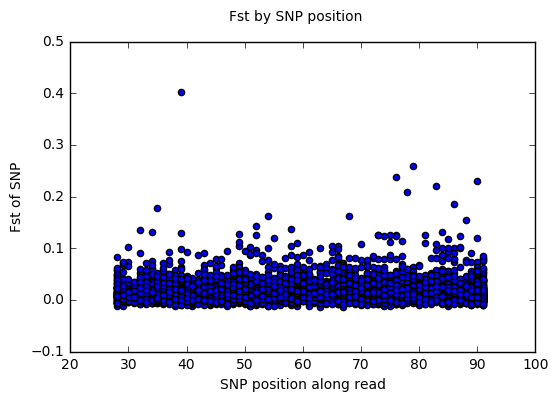

In [36]:
#create scatterplot
plt.scatter(snp_pos_list, fst_list)
plt.suptitle("Fst by SNP position")
plt.xlabel("SNP position along read")
plt.ylabel("Fst of SNP")
plt.show()

In [34]:
plt.close()


<br>

<br>
### Heterozygosity v. SNP position

<br>
For this I can use the parsed INF genepop file

In [7]:
cd ../analyses/stacks_pipeline_visuals/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses/stacks_pipeline_visuals


In [8]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses/stacks_pipeline_visuals'

In [9]:
cd ../

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [10]:
infile = open("genepop/batch_1_INFgenepop_parsed.txt", "r")

# create a list of populations and a dictionary 
# dictionary keys are loci, values are list of He by population

h_dict = {}
pop_list = []

for line in infile: 
    if "pop" not in line:
        #create population list
        linelist = line.strip().split()
        population = linelist[0]
        if population not in pop_list:
            pop_list.append(population)
        # create new dictionary entry to append to existing entry
        locus = linelist[1]
        if locus not in h_dict.keys():
            Ho = float(linelist[3])
            h_dict[locus] = [Ho]
        elif locus in h_dict.keys():
            het_list = h_dict[locus]
            Ho = float(linelist[3])
            het_list.append(Ho)
            h_dict[locus] = het_list

infile.close()

In [11]:
loci_list = h_dict.keys()
loci_list[0:5]

['10611', '4447', '4027', '11546', '4023']

Some of the loci don't have the heterozygosity measurements for all of the populations, while others do:

In [12]:
h_dict['10611']

[0.375, 0.261904761905]

In [13]:
h_dict['11546']

[0.0, 0.0322580645161, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0714285714286]

This was an error while parsing the genepop output because of the stupid way that genepop formats its output files. It's not expected to greatly impact the graphs that I made, so I won't worry about this too much, but will just have to keep it in mind going forward. 

In [19]:
# create a dictionary with snp positions at each locus
# uses marine's catalog file, only for haplotypes with a single snp

infile = open("../stacks_wgenome/batch_1.biallelic_catalog.tsv", "r")

#create dictionary of snp positions by locus
snp_pos_dict = {}

for line in infile:
    linelist = line.strip().split("\t")
    if len(linelist) == 4:
        snp_pos = int(linelist[3])
        locus = linelist[0]
        snp_pos_dict[locus] = snp_pos
    
        
infile.close()

snp_loci_list = snp_pos_dict.keys()

In [20]:
# get list of loci
loci_list = h_dict.keys()
avg_he_list = []
snp_pos_list = []

#find average he at each locus
for locus in loci_list:
    if locus in snp_loci_list:
        snp_pos = int(snp_pos_dict[locus])
        snp_pos_list.append(snp_pos)
        he_list = h_dict[locus]
        sum = 0
        for he in he_list:
            sum += float(he)
        average = float(sum)/float(len(he_list))
        avg_he_list.append(average)

In [21]:
len(avg_he_list)

3764

In [22]:
len(snp_pos_list)

3764

In [23]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

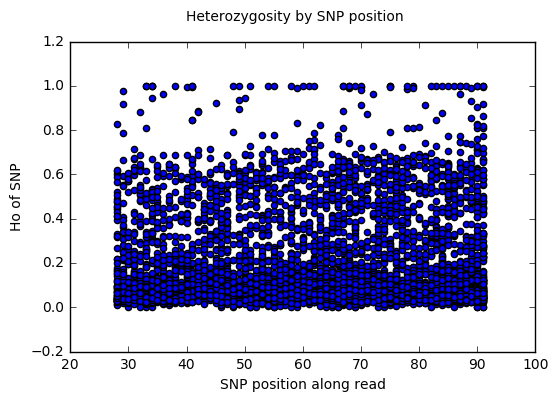

In [28]:
#create scatterplot
plt.scatter(snp_pos_list, avg_he_list)
plt.suptitle("Heterozygosity by SNP position")
plt.xlabel("SNP position along read")
plt.ylabel("Ho of SNP")
plt.show()

In [29]:
plt.close()